RED WINE QUALITY

In [46]:
import pandas as pd #Manejo y análisis de estructuras de datos
import numpy as mp # Cálculo numético y análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt #Creación de gráficos en dos dimensiones

#librerias para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sliearn.linear_model import LinearRegression 
from sklearn.metrics import classification_report, confusion_matrix

1. Realizar análsis exploratorio de datos (relaciones entre variables, valores atipicos, tendencias)

In [47]:
#Lectura de datos en  Python y cargamos en la variable de de Datos7  
Data = pd.read_csv('D:\Proyecto2022\Data\winequality-red.csv')

In [48]:
#Lectura de datos para análsis exploratorio
Data.head(8128)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [49]:
#Descripción de los datos
Data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [50]:
#Revisar tipo de datos y datos faltantes
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


2. Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesari.o

In [52]:
print("Cantidad de datos para variable -acidez fijado- sin información: ",Data['fixed acidity'].isin([0]).sum())
print("Cantidad de datos para variable -volatile acidity - sin información: ",Data['volatile acidity'].isin([0]).sum())
print("Cantidad de datos para variable -citric acid- sin información: ",Data['citric acid'].isin([0]).sum())
print("Cantidad de datos para variable -residual sugar- sin información: ",Data['residual sugar'].isin([0]).sum())
print("Cantidad de datos para variable -chlorides- sin información: ",Data['chlorides'].isin([0]).sum())
print("Cantidad de datos para variable -free sulfur dioxide- sin información: ",Data['free sulfur dioxide'].isin([0]).sum())
print("Cantidad de datos para variable -total sulfur dioxide- sin información: ",Data['total sulfur dioxide'].isin([0]).sum())
print("Cantidad de datos para variable -density- sin información: ",Data['density'].isin([0]).sum())
print("Cantidad de datos para variable -pH- sin información: ",Data['pH'].isin([0]).sum())
print("Cantidad de datos para variable -sulphates- sin información: ",Data['sulphates'].isin([0]).sum())
print("Cantidad de datos para variable -alcohol- sin información: ",Data['alcohol'].isin([0]).sum())
print("Cantidad de datos para variable -quality- sin información: ",Data['quality'].isin([0]).sum())

Cantidad de datos para variable -acidez fijado- sin información:  0
Cantidad de datos para variable -volatile acidity - sin información:  0
Cantidad de datos para variable -citric acid- sin información:  132
Cantidad de datos para variable -residual sugar- sin información:  0
Cantidad de datos para variable -chlorides- sin información:  0
Cantidad de datos para variable -free sulfur dioxide- sin información:  0
Cantidad de datos para variable -total sulfur dioxide- sin información:  0
Cantidad de datos para variable -density- sin información:  0
Cantidad de datos para variable -pH- sin información:  0
Cantidad de datos para variable -sulphates- sin información:  0
Cantidad de datos para variable -alcohol- sin información:  0
Cantidad de datos para variable -quality- sin información:  0


In [53]:
# Reemplazar valores 
Data['citric acid'] = Data['citric acid'].replace(0, Data['citric acid'].mean())

In [54]:
print("Cantidad de datos para variable -citric acid- sin información: ",Data['citric acid'].isin([0]).sum())

Cantidad de datos para variable -citric acid- sin información:  0


Text(0.5, 1.0, 'Representación de datos atipicos y faltantes para acidez fija')

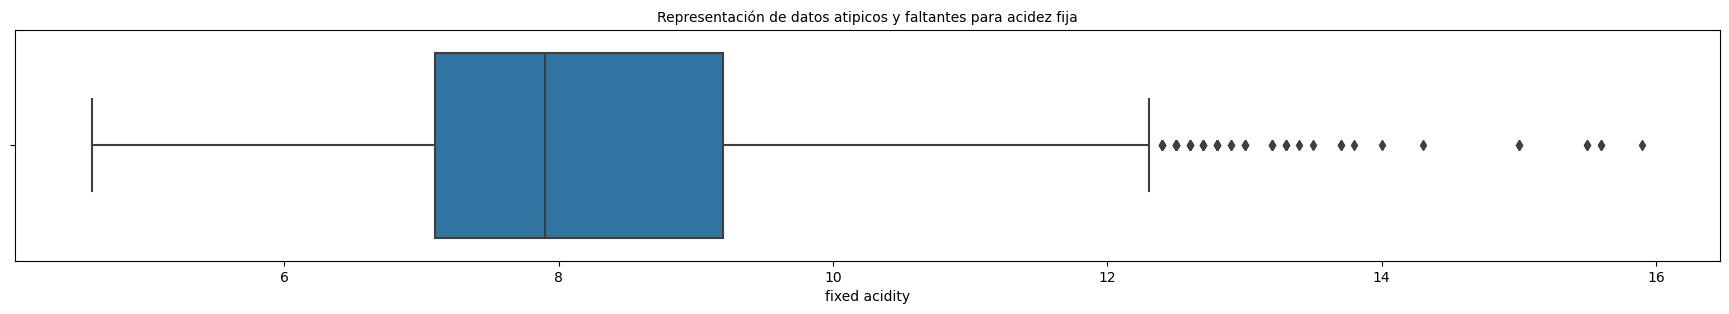

In [55]:
#Identificación de datos faltantes y atipicos variable fixed acidity
plt.figure(figsize=(22,3))
sns.boxplot(x=Data['fixed acidity'])
plt.title('Representación de datos atipicos y faltantes para acidez fija', fontsize=10)

In [60]:
#Contar datos atipicos variable acidez fija
nivel_min = 3
nivel_max = 12.7
Cant_Atipicos=((Data['fixed acidity']<nivel_min)|(Data['fixed acidity']>nivel_max)).sum()
print("El total de los datos atipicos para variable -fixed acidity- es {}".format(Cant_Atipicos))

El total de los datos atipicos para variable -fixed acidity- es 10


In [61]:
#Filtrar datos atipicos
Data=Data[(Data['fixed acidity']>nivel_min)&(Data['fixed acidity']<nivel_max)]

In [39]:
#Validar si se eliminaron datos atípicos
Cant_Atipicos=((Data['fixed acidity']<nivel_min)|(Data['fixed acidity']>nivel_max)).sum()
print("El total de los datos atipicos para variable -fixed acidity- es {}".format(Cant_Atipicos))

El total de los datos atipicos para variable -fixed acidity- es 0


Text(0.5, 1.0, 'Representación de datos atipicos y faltantes para acidez fija')

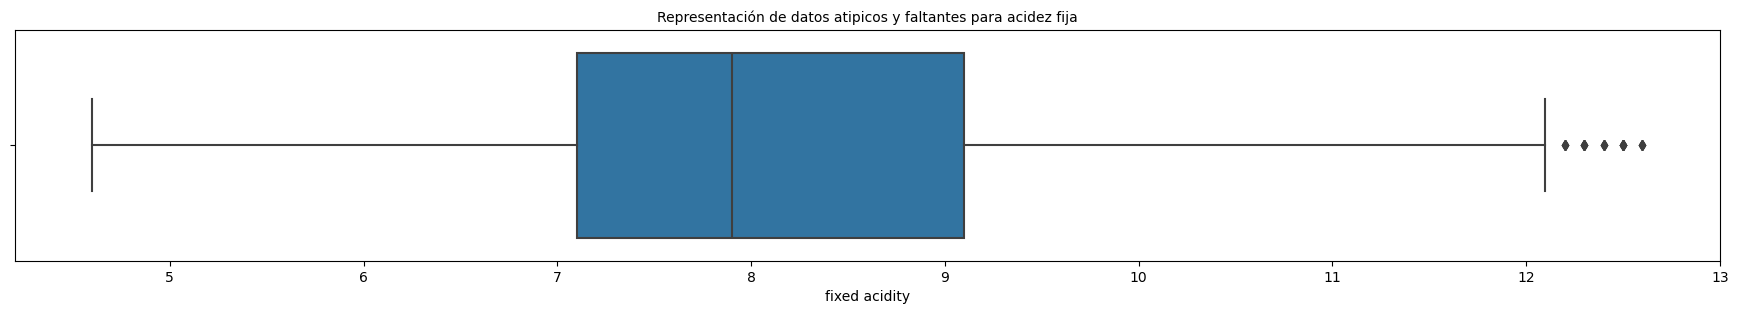

In [62]:
#Identificación de datos faltantes y atipicos variable fixed acidity
plt.figure(figsize=(22,3))
sns.boxplot(x=Data['fixed acidity'])
plt.title('Representación de datos atipicos y faltantes para acidez fija', fontsize=10)

Identificar y reemplazar valore atípicos para todas las variables

Text(0.5, 1.0, 'Representación de datos atipicos y faltantes para acidez volátil')

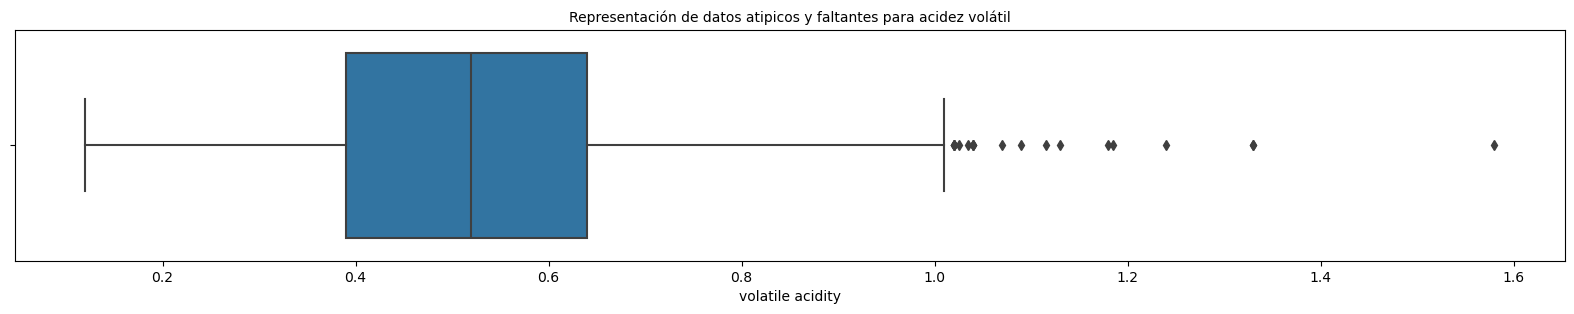

In [65]:
#Identificación de datos faltantes y atipicos variable volatile acidity
plt.figure(figsize=(20,3))
sns.boxplot(x=Data['volatile acidity'])
plt.title('Representación de datos atipicos y faltantes para acidez volátil', fontsize=10)

In [67]:
#Contar datos atipicos variable acidez volatil
nivel_min = 0.12
nivel_max = 1.6
Cant_Atipicos=((Data['volatile acidity']<nivel_min)|(Data['volatile acidity']>nivel_max)).sum()
print("El total de los datos atipicos para variable -volatile acidity- es {}".format(Cant_Atipicos))

El total de los datos atipicos para variable -volatile acidity- es 8


In [68]:
#Filtrar datos atipicos
Data=Data[(Data['volatile acidity']>nivel_min)&(Data['fixed acidity']<nivel_max)]

In [69]:
#Validar si se eliminaron datos atípicos
Cant_Atipicos=((Data['volatile acidity']<nivel_min)|(Data['volatile acidity']>nivel_max)).sum()
print("El total de los datos atipicos para variable -volatile acidity- es {}".format(Cant_Atipicos))

El total de los datos atipicos para variable -volatile acidity- es 0


3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

4. Dividir el dataset en Train y Test para evaluar correctamente el 
modelo.

5. Entrenar el modelo configurando los diferentes hiperparámetros.Entrenar el modelo configurando los diferentes 
hiperparámetros.


6. Evaluar el desempeño del modelo en el conjunto de Test con 
métricas como precisión, recall, F1-score, etc.

7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

8. Interpretar, analizar y documentar los resultados obtenidos.